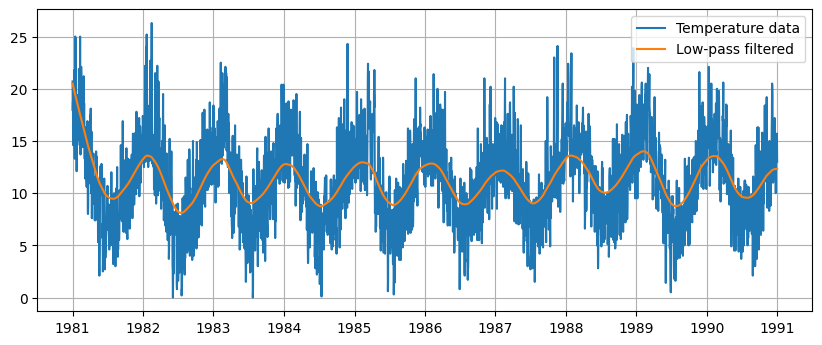

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import time 
from datetime import datetime
from scipy.signal import butter, filtfilt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)

dates = [0] * data.shape[0]
unix_time = [0] * data.shape[0]

temperature = data["Temp"]

for i in range(data.shape[0]):
    dates[i] = datetime.strptime(data['Date'][i],"%Y-%m-%d")
    unix_time[i] = time.mktime(dates[i].timetuple())

# plt.plot(dates, temperature)
# Data filtering
unix_time = np.array(unix_time)
T = np.max(unix_time) - np.min(unix_time) # lenght of data interval
n = int(unix_time.shape[0]) #number of observations
fs = n/T #sample rate Hz
cutoff = 1/(365.25*24*60*60) #highest frequency
nyq = fs/2
order = 1

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype = "low", analog = False)
    y = filtfilt(b, a, data)
    return y 

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype = "high", analog = False)
    y = filtfilt(b, a, data)
    return y 


y = butter_lowpass_filter(temperature, cutoff, fs, nyq, order)
y2 = butter_highpass_filter(temperature, cutoff, fs, nyq, order)
plt.figure(figsize = (10,4), dpi=100)
plt.plot(dates, temperature)
plt.plot(dates, y)
plt.legend(["Temperature data", "Low-pass filtered", "High-pass filtered"])
plt.grid(True)

plt.show()


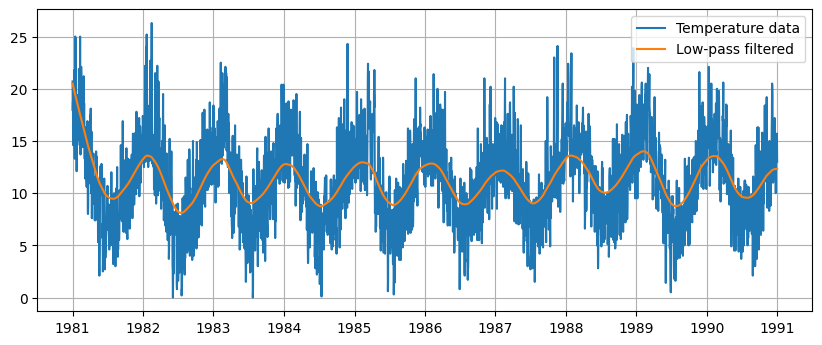